<style>
    .titulo-violeta {
        color: #c485ff;
    }
</style>

<h1 class="titulo-violeta">TP Convolutional Neural Networks</h1>

## <span style="color:lightblue">Avanzado IA</span>

### <span style="color:lightblue">Tp hecho por Benjamin Kapustiansky, Gabriel Slotnisky, Lucas Bertoloni y Oliver Safdieh</span> 

## Problematica a resolver:
Un programa no podia diferenciar entre algunos tipos de frutas (apple, palta, banana, cereza y kiwi)

## Solución propuesta:
Mediante un modelo de CNN, nosotros logramos identificar y diferenciar estas frutas. Es una clasificación multiclase de una sola salida. En este caso, las clases son 5.

## <span style="color:lightblue">Libraries</span>

In [1]:
# Estas líneas de código nos permiten instalar opencv desde Jupyter Notebook, que vamos a necesitar para importar 'cv2'
import sys
!{sys.executable} -m pip install opencv-python --user


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# %pip install matplotlib
# %pip install numpy
# %pip install tensorflow
# %pip install pandas
# %pip install scikit-learn
# %pip install seaborn

In [3]:
import tensorflow as tf
from tensorflow import keras

# print(tf.__version__)

In [4]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
import seaborn as sns

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import csv

from PIL import Image

import os
import shutil

import random
SEED = 456
random.seed(SEED)

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## <span style="color:lightblue">Dataset</span>

### Introducción

El dataset lo armamos nosotros con imagenes extraidas de Kaggle. Estas imagenes estaban ya distribuidas en capertas distintas entre train y test y subdivididas en sus respectivas clases. Lo que nostros hicimos a mano, fue filtrar imagenes que no nos servian y ademas unificar estas imagenes por clase para luego nosotros decidir la proporcion a utilizar entre TRAIN, TEST y VALIDATION

Link al [Kaggle](https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class?select=MY_data)

### Armado del Dataset

Mover imagenes desde la carpeta original (Frutas) hacia la nueva creada por nosotros (Fruits)

In [7]:
# Definir las rutas de las carpetas
apple_paths = ["Frutas/apple", "Frutas/apple2"]
avocado_paths = ["Frutas/avocado", "Frutas/avocado2"]
banana_paths = ["Frutas/banana", "Frutas/banana2"]
cherry_paths = ["Frutas/cherry", "Frutas/cherry2"]
kiwi_paths = ["Frutas/kiwi", "Frutas/kiwi2"]

# Función para listar imágenes en carpetas
def list_images_in_paths(paths):
    images = []
    for path in paths:
        if os.path.exists(path):  # Verificar si la carpeta existe
            images.extend([os.path.join(path, file) for file in os.listdir(path) if file.endswith((".jpg", ".png", ".jpeg"))])
    return images

# Crear listas de imágenes divididas por clase
apple_images = list_images_in_paths(apple_paths)
avocado_images = list_images_in_paths(avocado_paths)
banana_images = list_images_in_paths(banana_paths)
cherry_images = list_images_in_paths(cherry_paths)
kiwi_images = list_images_in_paths(kiwi_paths)

# Ruta principal "fruits"
fruits_dir = "fruits"

# Crear carpeta principal si no existe
if not os.path.exists(fruits_dir):
    os.makedirs(fruits_dir)

# Función para mover las imágenes a las subcarpetas correspondientes
def move_images_to_fruit_folder(fruit_name, image_list):
    # Crear la subcarpeta de la fruta si no existe
    fruit_folder = os.path.join(fruits_dir, fruit_name)
    if not os.path.exists(fruit_folder):
        os.makedirs(fruit_folder)
    
    # Mover cada imagen a su carpeta correspondiente
    for image_path in image_list:
        if os.path.exists(image_path):
            # Obtener el nombre de la imagen
            image_name = os.path.basename(image_path)
            # Definir la ruta de destino
            destination = os.path.join(fruit_folder, image_name)
            # Mover la imagen
            shutil.move(image_path, destination)
            print(f"Moved {image_name} to {fruit_folder}")

# Mover las imágenes de cada clase a sus respectivas carpetas
move_images_to_fruit_folder("apple", apple_images)
move_images_to_fruit_folder("avocado", avocado_images)
move_images_to_fruit_folder("banana", banana_images)
move_images_to_fruit_folder("cherry", cherry_images)
move_images_to_fruit_folder("kiwi", kiwi_images)


Aca pasamos a crear el csv con las imagenes que estan en la carpeta Fruits

In [8]:
# Definir las listas de imágenes y sus etiquetas
classes = {
    0: "apple",
    1: "avocado",
    2: "banana",
    3: "cherry",
    4: "kiwi",
}

# Función para generar una lista de imágenes y etiquetas
def generate_image_label_list():
    image_label_list = []
    for label, fruit in classes.items():
        fruit_folder = os.path.join(fruits_dir, fruit)
        if os.path.exists(fruit_folder):
            # Listar todas las imágenes de la carpeta
            images = [os.path.join(fruit_folder, file) for file in os.listdir(fruit_folder) if file.endswith((".jpg", ".png", ".jpeg"))]
            # Añadir las imágenes con su etiqueta
            image_label_list.extend([[image, label] for image in images])
    return image_label_list

# Generar la lista de imágenes y etiquetas
image_label_list = generate_image_label_list()

# Crear el archivo CSV
csv_file_path = "fruits.csv"
with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    # Escribir los encabezados
    writer.writerow(["Image", "Label"])
    # Escribir las filas (imagen, etiqueta)
    writer.writerows(image_label_list)

print(f"CSV file created successfully: {csv_file_path}")


CSV file created successfully: fruits.csv


### Import dataset

In [9]:
archivo = "fruits.csv"

# Leer datos del archivo
frutas : pd.DataFrame = pd.read_csv(archivo)
frutas

,Image,Label
0,fruits\apple\images.jpeg,0
1,fruits\apple\img_01.jpeg,0
2,fruits\apple\img_1001.jpeg,0
3,fruits\apple\img_101.jpeg,0
4,fruits\apple\img_1011.jpeg,0
...,...,...
1596,fruits\kiwi\img_931.jpeg,4
1597,fruits\kiwi\img_941.jpeg,4
1598,fruits\kiwi\img_961.jpeg,4
1599,fruits\kiwi\img_971.jpeg,4


### Plot 10 images

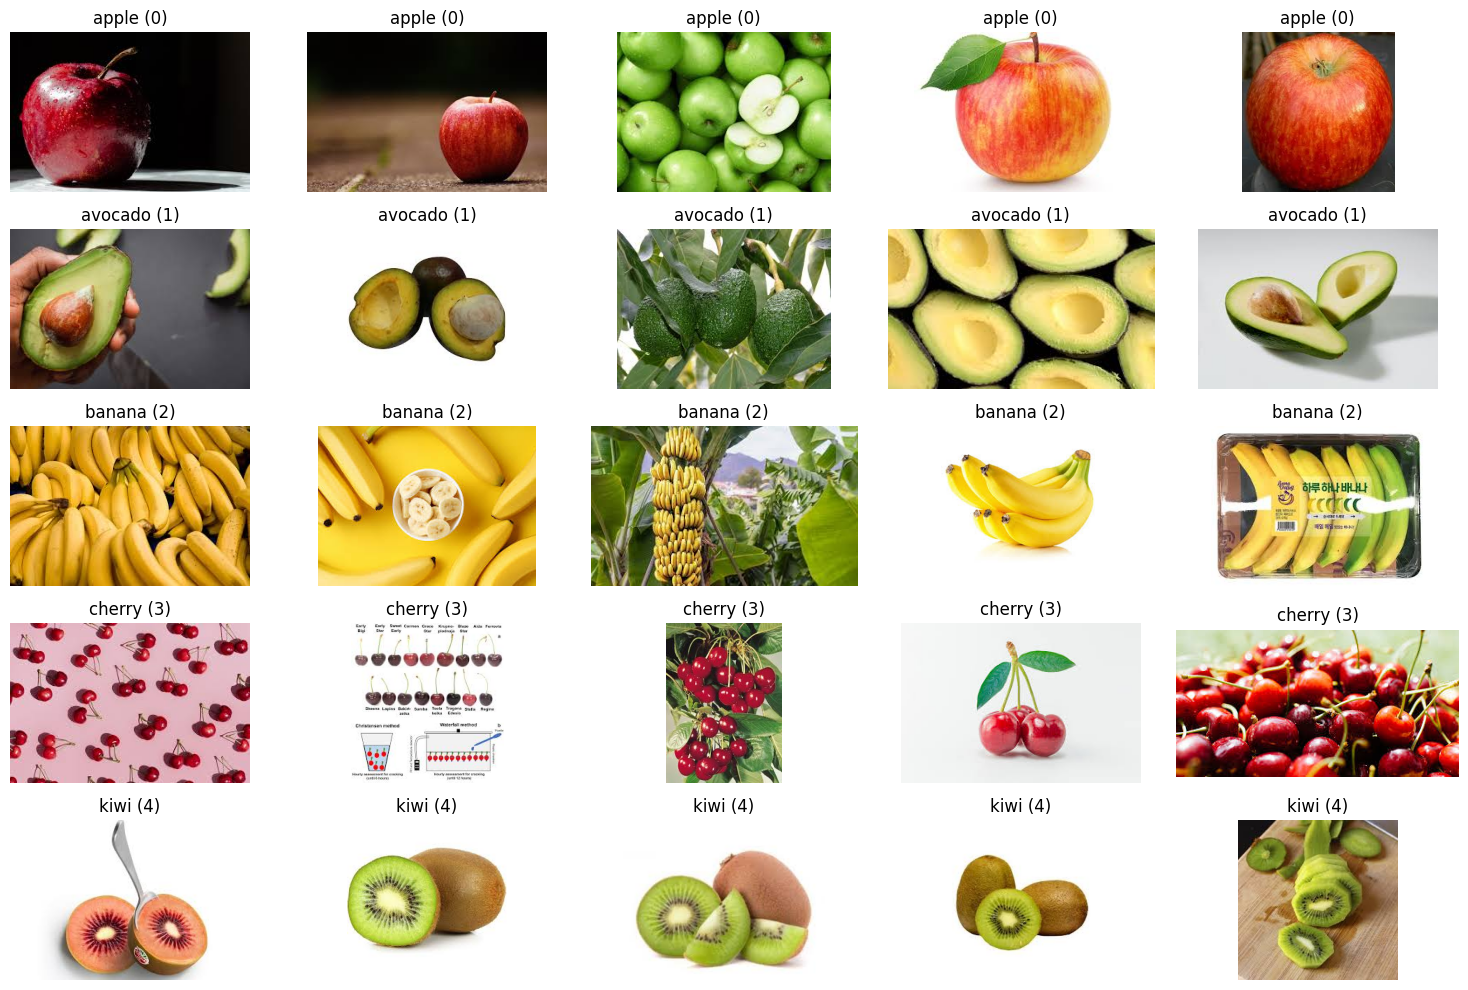

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Función para visualizar imágenes
def visualize_images_per_class(image_label_list, classes, images_per_class=5):
    # Crear una figura para mostrar imágenes
    num_classes = len(classes)
    plt.figure(figsize=(15, num_classes * 2))
    
    # Filtrar y mostrar imágenes por clase
    for class_label, class_name in classes.items():
        # Filtrar las imágenes de la clase actual
        class_images = [item for item in image_label_list if item[1] == class_label]
        selected_images = class_images[:images_per_class]  # Seleccionar las primeras `images_per_class`
        
        for i, (image_path, label) in enumerate(selected_images):
            # Subplot para cada imagen
            plt_index = i + 1 + class_label * images_per_class
            plt.subplot(num_classes, images_per_class, plt_index)
            
            # Abrir y mostrar la imagen
            if os.path.exists(image_path):
                image = Image.open(image_path)
                plt.imshow(image)
            plt.axis("off")  # Quitar ejes
            plt.title(f"{class_name} ({label})")
    
    plt.tight_layout()
    plt.show()

# Llamar a la función
visualize_images_per_class(image_label_list, classes, images_per_class=5)



### Dataset Split

#### Variables globales

In [11]:
batch_size = 32
data_dir = "fruits"
img_height = 100
img_width = 100

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size)
ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      color_mode='rgb',
      batch_size=32,
      image_size=(img_height, img_width),
      shuffle=True,
      seed=SEED,
  )

Found 1601 files belonging to 5 classes.
Using 1281 files for training.
Found 1601 files belonging to 5 classes.
Using 320 files for validation.
Found 1601 files belonging to 5 classes.


In [13]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert train_split + val_split + test_split == 1.0
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=SEED)

        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)

        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size + val_size)
    return train_ds, test_ds, val_ds
train_ds, test_ds, val_ds = get_dataset_partition_tf(ds, shuffle_size=10000, train_split = 0.6, val_split = 0.2, test_split = 0.2)

In [14]:
# Listas para almacenar las características (X_test) y las etiquetas (y_test)
X_test = []
y_test = []

# Itera sobre el dataset de prueba
for features, labels in test_ds:
    X_test.append(features.numpy())  # Convertir los tensores a arrays de NumPy
    y_test.append(labels.numpy())

# Convertir las listas a arrays de NumPy
X_test = np.array(X_test)
y_test = np.array(y_test)

# <span style="color:gold">Secuential Model- Model 1</span>

Creacion del modelo

In [15]:
# MODELO DE IA DEL PROYTECTO DE BENJO, MODIFICARLO A NUESTRO PROYECTO

num_classes = 5  # Para clasificación multiclase

# Define la capa de entrada explícitamente
inputs = tf.keras.Input(shape=(img_height, img_width, 3), name='input_layer')

# Define el modelo secuencial utilizando el input explícito
x = tf.keras.layers.Rescaling(1./255, name='res_layer_1')(inputs) #rescala
x = tf.keras.layers.Conv2D(8, 3, padding='same', name='conv_layer_1')(x) #primera capa convolucional
x = tf.keras.layers.Activation('relu', name='conv_layer_1_act')(x) #función de activación
x = tf.keras.layers.MaxPooling2D(name='max_pooling_layer_1')(x) #capa de pooling
x = tf.keras.layers.Conv2D(8, 3, padding='same', name='conv_layer_2')(x) #segunda capa convolucional
x = tf.keras.layers.Activation('relu', name='conv_layer_2_act')(x) #función de activación
x = tf.keras.layers.MaxPooling2D(name='max_pooling_layer_2')(x) #capa de pooling
x = tf.keras.layers.Flatten(name='flatten_layer_1')(x) #aplanar
x = tf.keras.layers.Dense(128, name='dense_layer_1', activation='relu')(x) #bias, weights, función de activación (relu)

# Salida final con activación sigmoid para clasificación binaria
outputs = tf.keras.layers.Dense(num_classes, name='output_layer', activation="softmax")(x) #nos devuleve 5 outputs

# Crea el modelo funcional
modelo = tf.keras.Model(inputs=inputs, outputs=outputs)

## Compilación del modelo

In [16]:
modelo.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [17]:
history = modelo.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
  )

Epoch 1/25


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3822 - loss: 1.3884 - val_accuracy: 0.5640 - val_loss: 1.0350
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6155 - loss: 0.9596 - val_accuracy: 0.5675 - val_loss: 1.0028
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6200 - loss: 0.9013 - val_accuracy: 0.7031 - val_loss: 0.7709
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6966 - loss: 0.8445 - val_accuracy: 0.7250 - val_loss: 0.7901
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7210 - loss: 0.7501 - val_accuracy: 0.7312 - val_loss: 0.6767
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7819 - loss: 0.6311 - val_accuracy: 0.7937 - val_loss: 0.5723
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8077 - loss: 0.6101 - val_accuracy: 0.8375 - val_loss: 0.4826
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7852 - loss: 0.5538 - val_accuracy: 0.8616 - val_loss: 0.

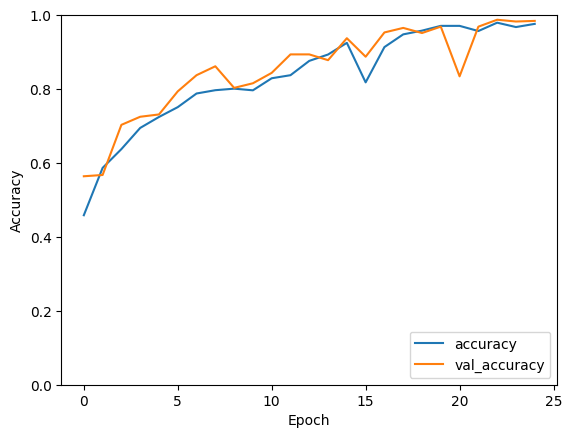

In [18]:
#grafico
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

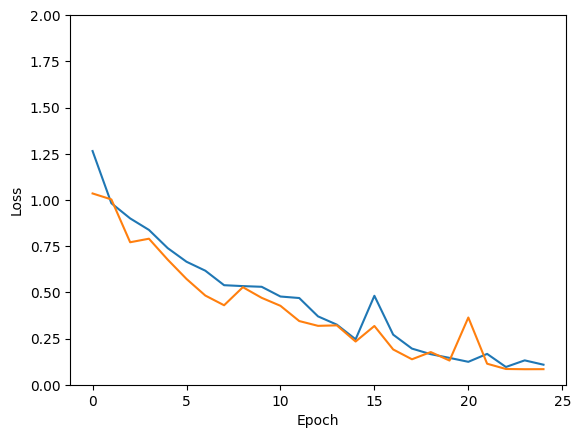

In [19]:
#grafico de la loss 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.show()

## <span style="color:lightblue">Model 1 - Evaluation</span>

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, roc_curve

### Accuracy, Validation Accuracy, Loss, Validation Loss

In [21]:
def evaluate_model1(history, epochs, digits_round=2):
    acc = history.history['accuracy']
    acc = round(acc[epochs], digits_round)
    acc = str(acc)


    val_acc = history.history['val_accuracy']
    val_acc = round(val_acc[epochs], digits_round)
    val_acc = str(val_acc)

    loss = history.history['loss']
    loss = round(loss[epochs], digits_round)
    loss = str(loss)

    val_loss = history.history['val_loss']
    val_loss = round(val_loss[epochs], digits_round)
    val_loss = str(val_loss)

    print("Accuracy: " + acc)
    print("Validation Accuracy: " + val_acc)
    print("Loss: " + loss)
    print("Validation Loss: " + val_loss)

In [22]:
evaluate_model1(history, 24)

Accuracy: 0.98
Validation Accuracy: 0.98
Loss: 0.11
Validation Loss: 0.08


In [23]:
X_test = X_test.reshape(-1, 100, 100, 3)

In [24]:
print(X_test.shape)  # Should output (352, 100, 100, 3)

(352, 100, 100, 3)


In [25]:
y_pred = modelo.predict(X_test)
y_pred

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[1.4121876e-03, 9.8813665e-01, 4.4025725e-04, 1.6193690e-04,
        9.8489979e-03],
       [9.9321333e-06, 5.9865247e-03, 9.3791097e-01, 4.1540471e-07,
        5.6092158e-02],
       [4.1713418e-05, 2.4915891e-05, 9.9976867e-01, 2.7953642e-09,
        1.6468283e-04],
       ...,
       [2.3324975e-04, 5.7429083e-05, 8.2938081e-01, 5.5859173e-10,
        1.7032847e-01],
       [1.8123617e-04, 1.9375507e-03, 9.9379718e-01, 6.4386157e-08,
        4.0840777e-03],
       [1.6101402e-04, 6.1692490e-06, 9.9936038e-01, 8.8986284e-11,
        4.7245374e-04]], dtype=float32)

### Confusion Matrix

In [26]:
def confusion_matrix1(y_test, y_pred):
    # Check if y_pred is 1-dimensional or 2-dimensional
    if y_pred.ndim == 1:
        y_pred_class = y_pred
    else:
        y_pred_class = y_pred.argmax(axis=1)
    
    accuracy = accuracy_score(y_test, y_pred_class)
    print("Accuracy:", accuracy)

    cm = confusion_matrix(y_test, y_pred_class)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot=True, ax=ax)
    _ = plt.xlabel("Predicted")
    _ = plt.ylabel("Actual")

In [27]:
# Assuming y_test has shape (11, 32)
y_test = y_test.reshape(-1)

# Now y_test should have shape (352,)

In [28]:
X_test = X_test.reshape(-1, 100, 100, 3)
y_pred = modelo.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Accuracy: 0.96875


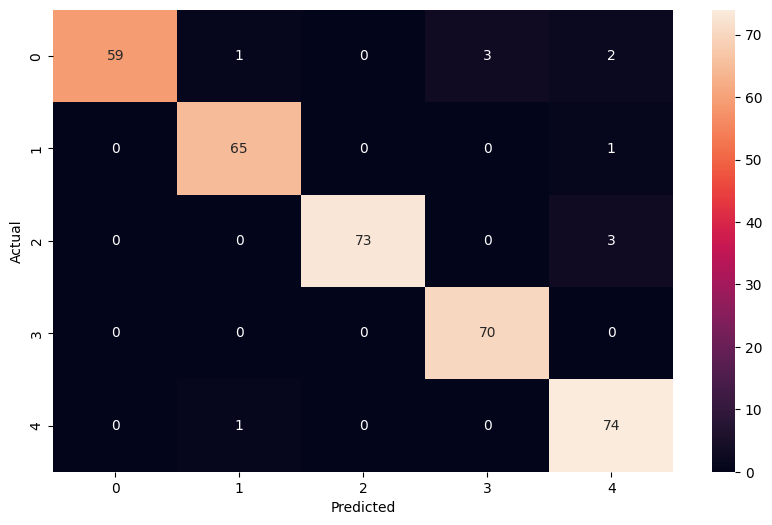

In [29]:
confusion_matrix1(y_test, y_pred)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

%pip install pydot




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# Plot the model architecture
plot_model(modelo, to_file='model_architecture.png', show_shapes=True, dpi=75)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## <span style="color:lightblue">Model 1 - Save</span>

In [32]:
modelo.save('ModelSecuential.h5')

# <span style="color:gold">VGG16 - Model 2</span>

In [33]:
# Cargar VGG16 preentrenado sin la parte de clasificación
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas convolucionales preentrenadas
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [34]:
# Añadir nuevas capas completamente conectadas
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Para evitar sobreajuste
output = Dense(num_classes, activation='softmax')(x)  # Número de clases

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=output)

In [35]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=4,
)

Epoch 1/4


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 100, 100, 3)

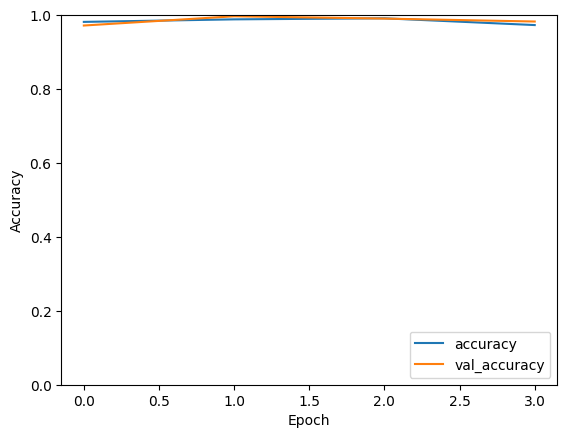

In [ ]:
#grafico
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

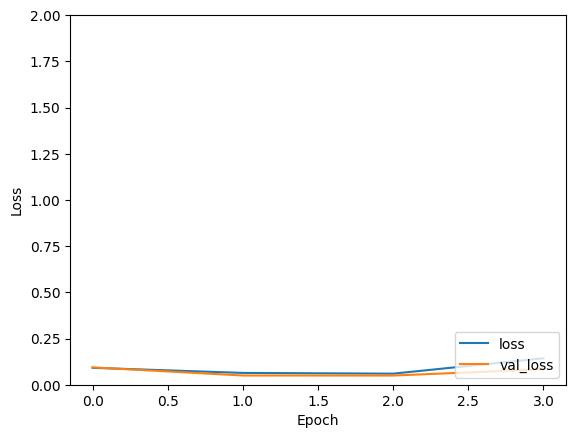

In [ ]:
#grafico de la loss 
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('VGG16_Model.h5')